In [ ]:
Q

In [4]:
import whisper

In [5]:
import matplotlib.pyplot as plt


In [6]:
import numpy as np

In [7]:
import IPython.display as ipd


In [8]:
import librosa

In [9]:
import torch

In [11]:
model_m = whisper.load_model('medium')

In [12]:
file_path = r"C:\Users\hp\Downloads\WhatsApp Audio 2023-12-17 at 17.05.06_bde59585.waptt (online-audio-converter.com).mp3"

In [13]:
audio_13 = whisper.load_audio(file_path)
audio_13

array([ 0.0000000e+00,  0.0000000e+00, -3.0517578e-05, ...,
        1.0070801e-03,  1.1901855e-03,  1.1291504e-03], dtype=float32)

In [14]:
T = 2

In [15]:
#Checking the number of samples in our audio file
n_samples =  audio_13.shape[0]
n_samples

38366

In [16]:
#Time between samples
delta = T/n_samples
delta

5.2129489652296305e-05

In [17]:
#Sampling frequency
Fs = 1/delta
Fs

19183.0

In [18]:
#Time of each sample
time = np.linspace(0,(n_samples-1) * delta,n_samples)
time

array([0.00000000e+00, 5.21294897e-05, 1.04258979e-04, ...,
       1.99984361e+00, 1.99989574e+00, 1.99994787e+00])

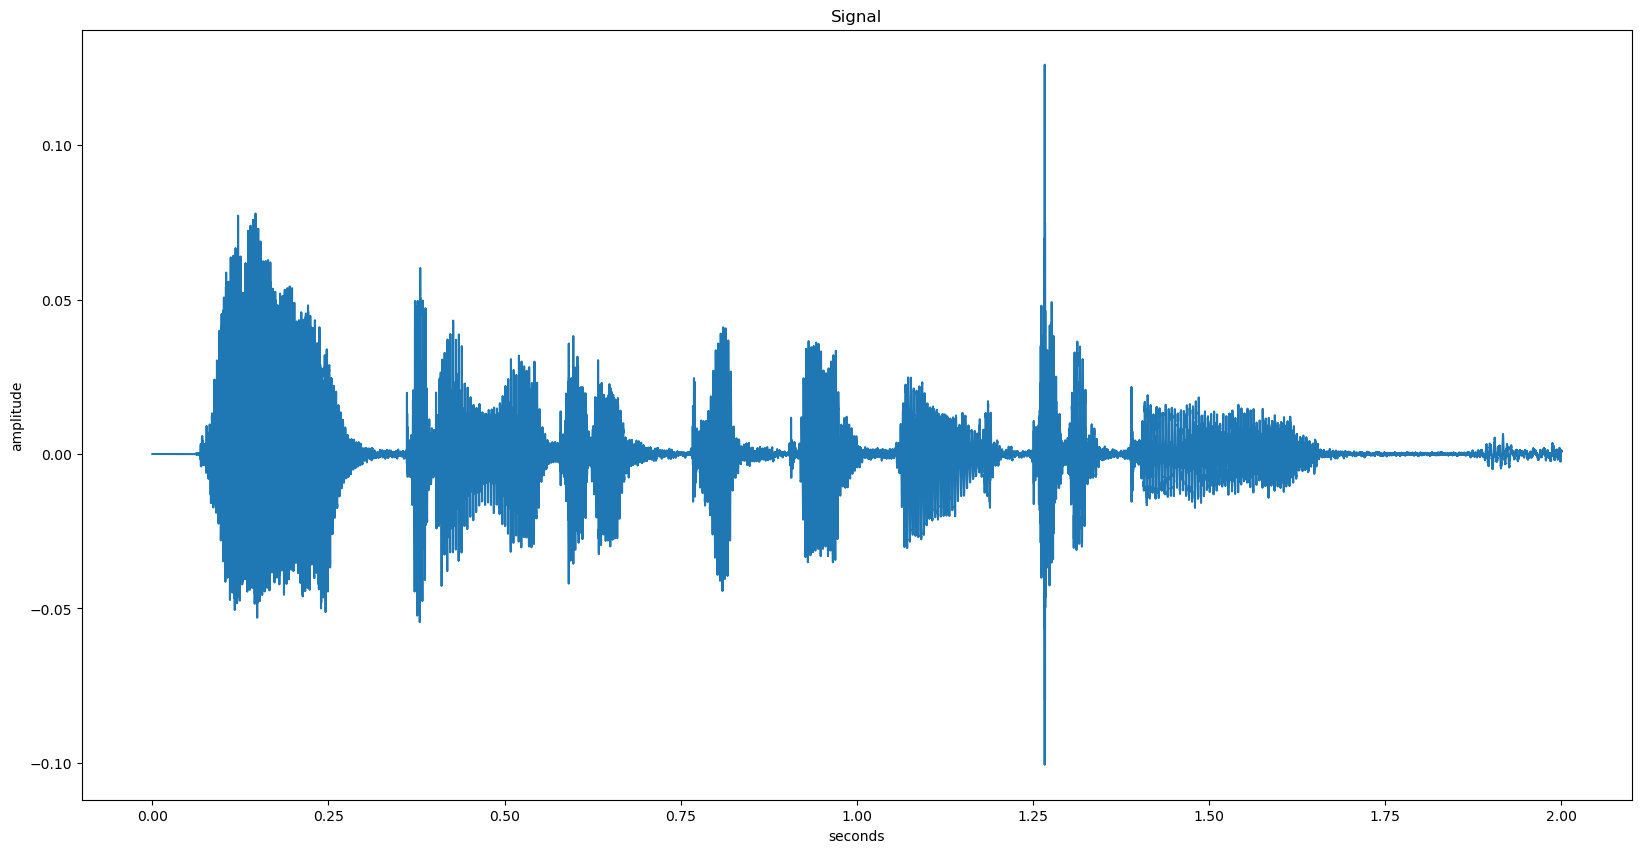

In [19]:
plt.figure(figsize=(20,10))
plt.title('Signal')
plt.plot(time,audio_13)
plt.ylabel('amplitude')
plt.xlabel('seconds')
plt.show()

In [20]:
audio = whisper.pad_or_trim(audio_13)

In [21]:
#Number of samples in our trimmed/padded audio
n_samples =  audio.shape[-1]
#Time of each sample
time = np.linspace(0,(n_samples-1)*delta,n_samples)

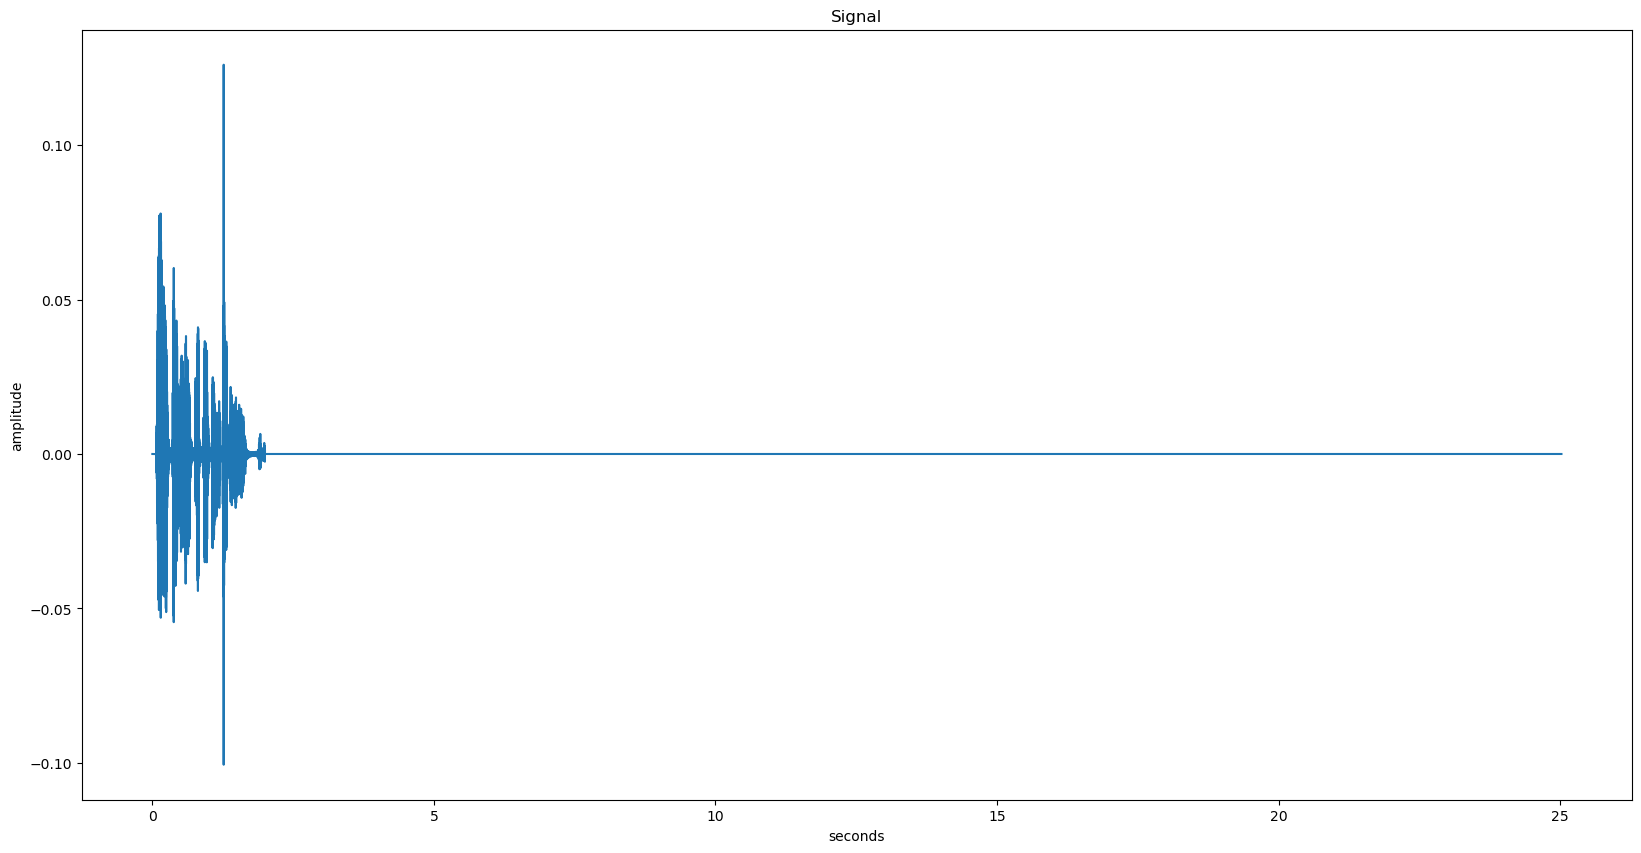

In [22]:
plt.figure(figsize=(20,10))
plt.title('Signal')
plt.plot(time,audio)
plt.ylabel('amplitude')
plt.xlabel('seconds')
plt.show()

In [23]:
mel = whisper.log_mel_spectrogram(audio).to(model_m.device)

Text(42.597222222222214, 0.5, 'Mel Scale')

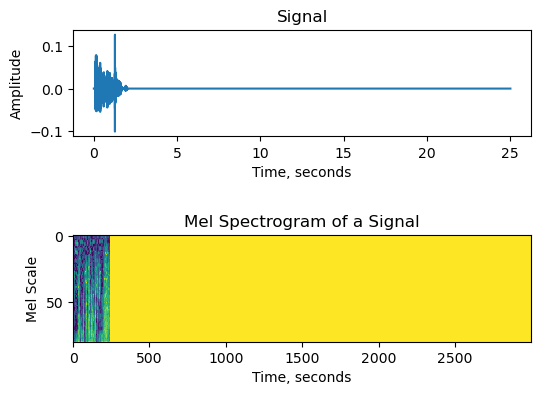

In [24]:
fig, (ax1, ax2) = plt.subplots(2)
fig.tight_layout(pad=5.0)
ax1.plot(time,audio)
ax1.set_title('Signal')
ax1.set_xlabel('Time, seconds')
ax1.set_ylabel('Amplitude')
ax2.imshow((mel.numpy()*mel.numpy())**(1/2),interpolation='nearest', aspect='auto')
ax2.set_title('Mel Spectrogram of a Signal')
ax2.set_xlabel('Time, seconds')
ax2.set_ylabel('Mel Scale')

In [25]:
sr=22050
ipd.Audio(audio, rate=sr)

In [26]:
probs = model_m.detect_language(mel)

In [27]:
probs

(tensor(50287),
 {'tr': 0.00042623025365173817,
  'gu': 1.3946025774203008e-06,
  'ms': 0.0008085914305411279,
  'nl': 0.00012891362712252885,
  'bs': 5.923511903205281e-09,
  'uk': 3.544742867234163e-05,
  'tl': 0.0009467845084145665,
  'si': 0.0006130531546659768,
  'mg': 1.1084257955928933e-08,
  'km': 0.0008221194730140269,
  'ne': 8.839919246383943e-06,
  'fa': 3.2234813716058852e-06,
  'uz': 4.17443368760928e-09,
  'hr': 7.651038345102279e-07,
  'ca': 9.960656370822107e-07,
  'es': 0.00020036002388224006,
  'vi': 6.85767299728468e-05,
  'af': 3.319849929539487e-05,
  'da': 2.630806932302221e-07,
  'bg': 9.159893124888185e-06,
  'tk': 1.0688557594562553e-08,
  'mi': 2.68561107077403e-05,
  'sq': 2.503265861264481e-08,
  'nn': 0.014486949890851974,
  'ba': 9.537856726637983e-09,
  'hi': 0.01725764386355877,
  'su': 5.459735774593355e-08,
  'mr': 4.183305281912908e-05,
  'am': 1.890556404759991e-07,
  'sv': 1.3998213944432791e-05,
  'yi': 9.242314291668663e-08,
  'ln': 1.76080057201

In [28]:
transcription = model_m.transcribe(file_path, fp16 = False)['text']

In [29]:
transcription

' ஹே! பராஜெக்ட் ரிபோட் முடிச்சுட்டியா'

In [30]:
translation = model_m.transcribe(file_path, language = 'en', fp16 = False)['text']

In [31]:
translation

' Hey, have you completed the project report?'